In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    
class k_armed_bandit:
    def __init__(self,numOfBandit,mean,variance,epsilon):
        self.reward = []
        self.historyOfReward = []
        self.epsilon = epsilon
        self.qValues = []
        self.numOfAction = []
        self.num = numOfBandit 
        self.rewardMean = mean
        self.rewardVariance = variance
        for i in range(numOfBandit):
            self.reward.append(0)
            self.qValues.append(0)
            self.numOfAction.append(0)
        
    def generateReward(self,action):
    
        self.reward[action] = np.random.normal(self.rewardMean[action],self.rewardVariance[action])
        return self.reward[action]   
     
    def updateQvalues(self,action,reward):
        self.qValues[action] = self.qValues[action]+(1/self.numOfAction[action])*(reward-self.qValues[action])
        
        
    def takeAction(self,epsilon):
        if np.random.rand()<epsilon:
            action = np.argmax(self.qValues)
        else:
            action = np.random.randint(self.num)
            
        return action
    
    def main(self,eps): 
        meanReward = 0
        for i in range(eps):
            action = self.takeAction(self.epsilon)
            self.numOfAction[action] += 1
            print(f'action at level {i} is: {action}')
            reward = self.generateReward(action)
            meanReward += reward
            print(f'total reward {meanReward} ')
            self.historyOfReward.append(meanReward/(i+1))
            self.updateQvalues(action,reward)
            
        

In [3]:
mean = [1,1,10,1,1,1]
variance = [1,1,1,1,1,1]

print(len(mean),len(variance))

env1 = k_armed_bandit(6,mean,variance,1)
env2 = k_armed_bandit(6,mean,variance,0.9)
env3 = k_armed_bandit(6,mean,variance,0.95)
env4 = k_armed_bandit(6,mean,variance,0.98)

env1.main(2500)
env2.main(2500)
env3.main(2500)
env4.main(2500)

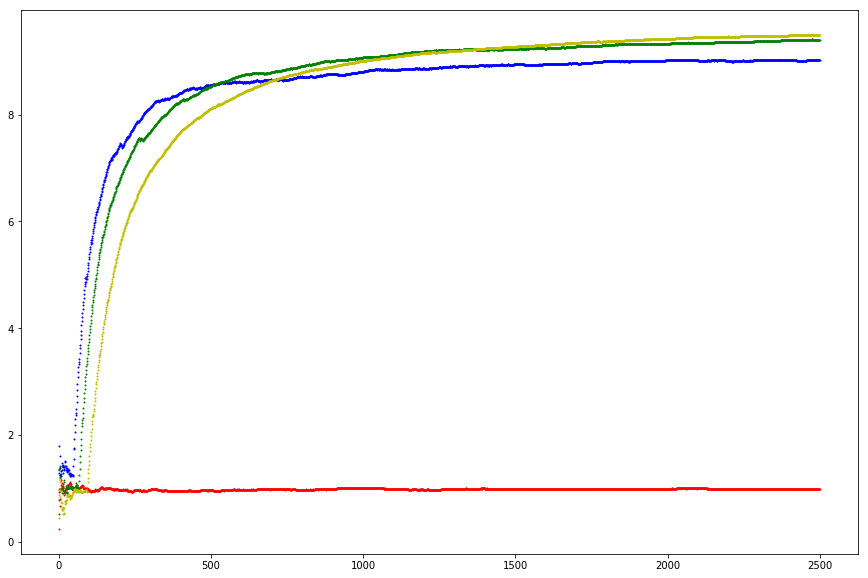

In [26]:
# plt.plot(env.historyOfReward,'ro',markersize=1)
# plt.ylabel('Reward')
# plt.xlabel('episode')
# plt.show()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.plot(env1.historyOfReward,'ro',markersize=1)
ax.plot(env2.historyOfReward,'bo',markersize=1)
ax.plot(env3.historyOfReward,'go',markersize=1)
ax.plot(env4.historyOfReward,'yo',markersize=1)